In [182]:
## Daniel Yuji Yamada 10430920
## Victor Caetano da Silva 9276999

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [183]:
df = pd.read_csv('E:\Daniel\Downloads\ddummy1.csv')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cadmio          30 non-null     float64
 1   Chumbo          30 non-null     float64
 2   Cromo           30 non-null     float64
 3   Niquel          30 non-null     float64
 4   Mercurio        30 non-null     float64
 5   Aluminio        30 non-null     float64
 6   Cobre           30 non-null     float64
 7   Ferro           30 non-null     float64
 8   Manganes        30 non-null     float64
 9   Zinco           30 non-null     float64
 10  CianoBacterias  30 non-null     int64  
dtypes: float64(10), int64(1)
memory usage: 2.7 KB


In [185]:
df.describe()

,Cadmio,Chumbo,Cromo,Niquel,Mercurio,Aluminio,Cobre,Ferro,Manganes,Zinco,CianoBacterias
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3.175778e-03,0.011971,0.032386,0.013871,0.001000,0.878623,4.301000,2.093467,0.240263,5.002333,186433.333333
std,3.070036e-03,0.010780,0.024545,0.010187,0.000709,0.608196,2.062314,1.535465,0.158785,1.143991,163989.209766
min,3.540000e-07,0.000220,0.000529,0.002000,0.000100,0.012300,1.000000,0.024000,0.002900,1.090000,1000.000000
25%,5.482500e-04,0.001695,0.005607,0.002285,0.000149,0.387500,2.990000,0.782500,0.125000,5.152500,48000.000000
50%,1.105000e-03,0.011500,0.050400,0.020450,0.001190,0.789000,4.045000,1.830000,0.250000,5.350000,135500.000000
75%,5.775000e-03,0.021000,0.053675,0.023250,0.001618,1.450000,5.697500,3.380000,0.385000,5.542500,320000.000000
max,9.400000e-03,0.031000,0.059000,0.025000,0.001930,1.990000,7.830000,4.950000,0.490000,5.870000,510000.000000


In [186]:
df.head()

,Cadmio,Chumbo,Cromo,Niquel,Mercurio,Aluminio,Cobre,Ferro,Manganes,Zinco,CianoBacterias
0,0.0060,0.023,0.0570,0.0212,0.00120,0.561,2.65,0.95,0.26,5.12,51000
1,0.0072,0.014,0.0520,0.0241,0.00145,0.798,3.47,4.21,0.34,5.84,154000
2,0.0043,0.031,0.0550,0.0222,0.00170,0.856,7.81,3.47,0.49,5.37,326000
3,0.0094,0.026,0.0590,0.0217,0.00111,0.346,4.77,2.73,0.14,5.16,124000
4,0.0048,0.021,0.0584,0.0249,0.00189,1.640,3.78,4.63,0.43,5.41,96000


In [187]:
#Define a quantidade de elementos analisados para além da densidade de ciano bacterias e o número de exemplos.
tam = len(df)
nSubs = len(df.axes[1]) - 1
print(tam)
print(nSubs)

30
10


In [188]:
import random

#IQA gerado aleatoriamente (IQA random)
iqar = []
for i in range(tam):
    r = random.randint(79, 100)
    iqar.append(r)
    ##print(r)

In [189]:
print(iqar)

[98, 92, 99, 91, 79, 97, 79, 82, 98, 94, 85, 89, 84, 90, 94, 82, 100, 92, 86, 96, 80, 95, 98, 100, 79, 86, 91, 81, 89, 80]


In [190]:
#Calcula o qi de cada exemplo
bact = df['CianoBacterias']
taxa = []
qBac = []

for i in range(tam):
    ncel = bact[i]
    ##print(ncel)
    if ncel <= 20000:
        taxa.append(1.0)
    elif ncel > 20000 and ncel <= 50000:
        taxa.append(0.8)
    elif ncel > 50000 and ncel <= 100000:
        taxa.append(0.7)
    elif ncel > 100000 and ncel <= 200000:
        taxa.append(0.6)
    elif ncel > 200000 and ncel <= 500000:
        taxa.append(0.5)
    elif ncel > 500000:
        taxa.append(0.35)

In [191]:
print(taxa)

[0.7, 0.6, 0.5, 0.6, 0.7, 0.8, 0.5, 0.5, 0.7, 0.8, 0.6, 0.5, 0.5, 0.5, 0.7, 0.6, 0.5, 0.8, 0.5, 0.5, 0.6, 0.8, 0.7, 0.6, 0.5, 0.35, 1.0, 1.0, 1.0, 1.0]


In [192]:
Cd = df['Cadmio']
Ch = df['Chumbo']
Cr = df['Cromo']
Ni = df['Niquel']
Hg = df['Mercurio']
Al = df['Aluminio']
Cu = df['Cobre']
Fe = df['Ferro']
Mn = df['Manganes']
Zn = df['Zinco']

##taxaInd = [[],[],[],[],[],[],[],[],[],[]]
taxaSubs = [[],[],[],[],[],[],[],[],[],[]]

for i in range(tam):
    qCd = Cd[i]
    qCh = Ch[i]
    qCr = Cr[i]
    qNi = Ni[i]
    qHg = Hg[i]
    qAl = Al[i]
    qCu = Cu[i]
    qFe = Fe[i]
    qMn = Mn[i]
    qZn = Zn[i]
    
    ##for j in range(nSubs):
    if qCd <= 0.005:
        ##taxaInd[0].append('i')
        taxaSubs[0].append(1.0)
    elif qCd > 0.005 and qCd < 0.01:
        q1 = 0.5 ** ((qCd-0.005)/(0.01 - 0.005))
        taxaSubs[0].append(q1)
        ##taxaInd[0].append('m')
    else:
        taxaSubs[0].append(0.0)
        ##taxaInd[0].append('s')
            
    if qCh <= 0.01:
        ##taxaInd[1].append('i')
        taxaSubs[1].append(1.0)
    elif qCh > 0.01 and qCh < 0.033:
        q2 = 0.5 ** ((qCh-0.01)/(0.033 - 0.01))
        taxaSubs[1].append(q2)
        ##taxaInd[1].append('m')
    else:
        taxaSubs[1].append(0.0)
        ##taxaInd[1].append('s')
            
    if qCr <= 0.05:
        ##taxaInd[2].append('i')
        taxaSubs[2].append(1.0)
    elif qCr > 0.05 and qCr < 0.059:
        q3 = 0.5 ** ((qCr-0.05)/(0.059 - 0.05))
        taxaSubs[2].append(q3)
        ##taxaInd[2].append('m')
    else:
        taxaSubs[2].append(0.0)
        ##taxaInd[2].append('s')
        
    if qNi <= 0.02:
        ##taxaInd[3].append('i')
        taxaSubs[3].append(1.0)
    elif qNi > 0.02 and qNi < 0.025:
        q4 = 0.5 ** ((qNi-0.02)/(0.025 - 0.02))
        taxaSubs[3].append(q4)
        ##taxaInd[3].append('m')
    else:
        taxaSubs[3].append(0.0)
        ##taxaInd[3].append('s')
        
    if qHg <= 0.001:
        ##taxaInd[4].append('i')
        taxaSubs[4].append(1.0)
    elif qHg > 0.001 and qHg < 0.002:
        q5 = 0.5 ** ((qHg-0.001)/(0.002 - 0.001))
        taxaSubs[4].append(q5)
        ##taxaInd[4].append('m')
    else:
        taxaSubs[4].append(0.0)
        ##taxaInd[4].append('s')
        
    if qAl <= 0.2:
        ##taxaInd[5].append('i')
        taxaSubs[5].append(1.0)
    elif qAl > 0.2 and qAl < 2.0:
        q6 = 0.5 ** ((qAl-0.2)/(2.0 - 0.2))
        taxaSubs[5].append(q6)
        ##taxaInd[5].append('m')
    else:
        taxaSubs[5].append(0.0)
        ##taxaInd[5].append('s')
            
    if qCu <= 2.0:
        ##taxaInd[6].append('i')
        taxaSubs[6].append(1.0)
    elif qCu > 2.0 and qCu < 8.0:
        q7 = 0.5 ** ((qCu-2.0)/(8.0 - 2.0))
        taxaSubs[6].append(q7)
        ##taxaInd[6].append('m')
    else:
        taxaSubs[6].append(0.0)
        ##taxaInd[6].append('s')
            
    if qFe <= 0.3:
        ##taxaInd[7].append('i')
        taxaSubs[7].append(1.0)
    elif qFe > 0.3 and qFe < 5.0:
        q8 = 0.5 ** ((qFe-0.3)/(5.0 - 0.3))
        taxaSubs[7].append(q8)
        ##taxaInd[7].append('m')
    else:
        taxaSubs[7].append(0.0) 
        ##taxaInd[7].append('s')
            
    if qMn <= 0.1:
        ##taxaInd[8].append('i')
        taxaSubs[8].append(1.0)
    elif qMn > 0.1 and qMn < 0.5:
        q9 = 0.5 ** ((qMn-0.1)/(0.5 - 0.1))
        taxaSubs[8].append(q9)
        ##taxaInd[8].append('m')
    else:
        taxaSubs[8].append(0.0)
        ##taxaInd[8].append('s')
            
    if qZn <= 5.0:
        ##taxaInd[9].append('i')
        taxaSubs[9].append(1.0)
    elif qZn > 5.0 and qZn < 5.9:
        q10 = 0.5 ** ((qZn-5.0)/(5.9 - 5.0))
        taxaSubs[9].append(q10)
        ##taxaInd[9].append('m')
    else:
        taxaSubs[9].append(0.0)
        ##taxaInd[9].append('s')
        

In [193]:
ISTO = []

## Vetor usado para armazenar todos os valores das substancia que participam de SO para fazer a média aritmética
SOa = []
    
for i in range(tam):
    for k in range(5,10):
        SOa.append(taxaSubs[k][i])
    
    print(SOa)    
    ST = min(taxaSubs[0][i],taxaSubs[1][i],taxaSubs[2][i],taxaSubs[3][i],taxaSubs[4][i], taxa[i])
    SO = sum(SOa) / len(SOa)
    SOa.clear()
    ##print(ST)
    ##print(SO)
    print(i + 1)
    
    total = ST * SO
    ISTO.append(total)
    

[0.8702153946847689, 0.9276591169413094, 0.9085905009697736, 0.7578582832551991, 0.9117224885582168]
1
[0.7943120406390111, 0.8438157961300179, 0.5617830908247731, 0.6597539553864471, 0.5236470614103136]
2
[0.7767679365853144, 0.511096163373604, 0.6265631876389328, 0.5087398460513433, 0.7520439537809918]
3
[0.9453293081309824, 0.7261468961291555, 0.6988131798838911, 0.9330329915368074, 0.8840636953004918]
4
[0.5743491774985175, 0.8141312676057002, 0.5280415660175669, 0.5644822024030657, 0.7292293051358275]
5
[0.6777799612487967, 0.5803519571918601, 0.8328740296432463, 0.6830201283771978, 0.5743491774985178]
6
[1.0, 1.0, 0.7736683891949483, 0.6049970446096462, 0.5236470614103136]
7
[0.6323910648476662, 0.6814438384924133, 0.9413257447040834, 0.7448387315613512, 0.5116869459983875]
8
[0.5256674182834713, 0.9760317607762247, 0.9882710765568682, 0.5843886242806229, 0.7180828550393736]
9
[0.5019291207972375, 0.7345843166391545, 0.6321320516618791, 0.8705505632961241, 0.6015125180410584]
10


In [194]:
print(ISTO)

[0.5104784486028056, 0.38328995807288646, 0.3175211087430186, 0.0, 0.3255046708585697, 0.3793320367134079, 0.3902312495214908, 0.3511686325603901, 0.5216662199263682, 0.5345133712696727, 0.42581118407429003, 0.3288264839092111, 0.37264773196860407, 0.3637129093405364, 0.5136798229426072, 0.36494374476858826, 0.37690253319910594, 0.7007886991888612, 0.0, 0.40446718885126387, 0.4356590569267654, 0.38466445946662575, 0.5382581746489177, 0.41871960809828546, 0.4465765523794058, 0.29254603903127235, 0.7952507001182052, 1.0, 1.0, 1.0]


In [195]:
IAP = []

for i in range(tam):
    produto = iqar[i] * ISTO[i]
    IAP.append(produto)

In [196]:
print(IAP)

[50.02688796307494, 35.26267614270555, 31.43458976555884, 0.0, 25.714868997827008, 36.79520756120057, 30.828268712197772, 28.79582786995199, 51.12328955278408, 50.24425689934923, 36.193950646314654, 29.265557067919787, 31.30240948536274, 32.73416184064828, 48.285903356605075, 29.925387071024236, 37.690253319910596, 64.47256032537523, 0.0, 38.82885012972133, 34.85272455414123, 36.543123649329445, 52.74930111559393, 41.87196080982854, 35.27954763797306, 25.158959356689422, 72.36781371075668, 81.0, 89.0, 80.0]


In [203]:
taxacao = ['Regular', 'Ruim', 'Ruim', 'Pessima', 'Ruim', 'Regular', 'Ruim', 'Ruim', 'Boa', 'Regular', 'Regular', 'Ruim', 'Ruim', 'Ruim', 'Regular', 'Ruim', 'Regular', 'Boa', 'Pessimo', 'Regular', 'Ruim', 'Regular', 'Boa', 'Regular', 'Ruim', 'Ruim', 'Boa', 'Otima', 'Otima', 'Otima']
print(len(taxacao))

30


In [226]:
from sklearn.tree import DecisionTreeClassifier
X = df
Y = taxacao

In [223]:
X

,Cadmio,Chumbo,Cromo,Niquel,Mercurio,Aluminio,Cobre,Ferro,Manganes,Zinco,CianoBacterias
0,6.000000e-03,0.02300,0.057000,0.02120,0.001200,0.5610,2.65,0.950,0.2600,5.12,51000
1,7.200000e-03,0.01400,0.052000,0.02410,0.001450,0.7980,3.47,4.210,0.3400,5.84,154000
2,4.300000e-03,0.03100,0.055000,0.02220,0.001700,0.8560,7.81,3.470,0.4900,5.37,326000
3,9.400000e-03,0.02600,0.059000,0.02170,0.001110,0.3460,4.77,2.730,0.1400,5.16,124000
4,4.800000e-03,0.02100,0.058400,0.02490,0.001890,1.6400,3.78,4.630,0.4300,5.41,96000
5,1.200000e-03,0.01200,0.051100,0.02410,0.001800,1.2100,6.71,1.540,0.3200,5.72,47000
6,3.500000e-04,0.00156,0.005230,0.00232,0.000162,0.1780,1.10,2.040,0.3900,5.84,427000
7,6.500000e-04,0.00147,0.005600,0.00211,0.000124,1.3900,5.32,0.710,0.2700,5.87,279000
8,5.200000e-04,0.00298,0.005220,0.00220,0.001540,1.8700,2.21,0.380,0.4100,5.43,67000
9,7.100000e-04,0.00112,0.005740,0.00242,0.000146,1.9900,4.67,3.410,0.1800,5.66,29000


In [224]:
Y

['Regular',
 'Ruim',
 'Ruim',
 'Pessima',
 'Ruim',
 'Regular',
 'Ruim',
 'Ruim',
 'Boa',
 'Regular',
 'Regular',
 'Ruim',
 'Ruim',
 'Ruim',
 'Regular',
 'Ruim',
 'Regular',
 'Boa',
 'Pessimo',
 'Regular',
 'Ruim',
 'Regular',
 'Boa',
 'Regular',
 'Ruim',
 'Ruim',
 'Boa',
 'Otima',
 'Otima',
 'Otima']

In [227]:
arvore_IAP = DecisionTreeClassifier(criterion='entropy')
arvore_IAP.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

In [210]:
arvore_IAP.feature_importances_

array([0.        , 0.        , 0.33777372, 0.19824091, 0.        ,
       0.        , 0.14782867, 0.        , 0.05738427, 0.        ,
       0.25877242])

[Text(0.4, 0.9, 'CianoBacterias <= 87500.0\nentropy = 2.097\nsamples = 30\nvalue = [4, 3, 1, 1, 9, 12]\nclass = Ruim'),
 Text(0.13333333333333333, 0.7, 'Cobre <= 2.095\nentropy = 1.539\nsamples = 11\nvalue = [3, 3, 0, 0, 5, 0]\nclass = Regular'),
 Text(0.06666666666666667, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]\nclass = Otima'),
 Text(0.2, 0.5, 'Niquel <= 0.002\nentropy = 0.954\nsamples = 8\nvalue = [3, 0, 0, 0, 5, 0]\nclass = Regular'),
 Text(0.13333333333333333, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0]\nclass = Boa'),
 Text(0.26666666666666666, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 5, 0]\nclass = Regular'),
 Text(0.6666666666666666, 0.7, 'Cromo <= 0.051\nentropy = 1.563\nsamples = 19\nvalue = [1, 0, 1, 1, 4, 12]\nclass = Ruim'),
 Text(0.4666666666666667, 0.5, 'Cromo <= 0.006\nentropy = 1.406\nsamples = 8\nvalue = [1, 0, 0, 0, 4, 3]\nclass = Regular'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 3]\ncl

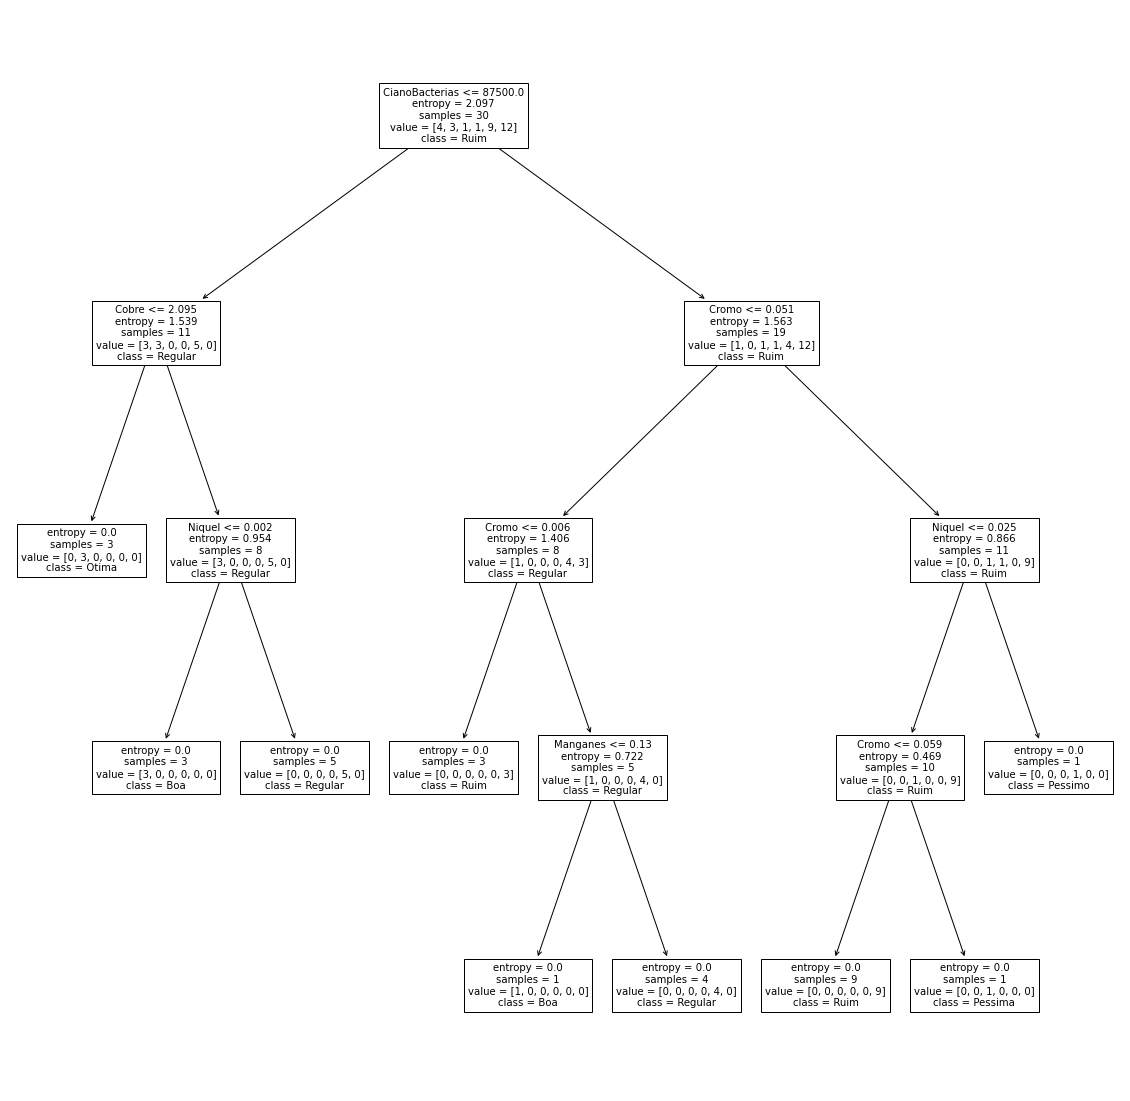

In [221]:
from sklearn import tree
atributos = ['Cadmio','Chumbo','Cromo','Niquel','Mercurio','Aluminio','Cobre','Ferro','Manganes','Zinco','CianoBacterias']
classes = ['Otimo', 'Bom', 'Regular', 'Ruim', 'Pessimo', 'Insatisfatorio']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_IAP, feature_names=atributos, class_names=arvore_IAP.classes_)